In [1]:
""" If not already in your environment, install necessary packages."""
#!pip install pickle, scipy

' If not already in your environment, install necessary packages.'

In [2]:
from common_functions import *
from plotting_functions import *

In [3]:
import math
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
import pickle
from random import randint

In [4]:
p_val = 0.01
n_lags = 3  # number of lags for GC

# Recording length (number of frames)
n_timesteps = 1000

# Acquisition rate
frame_rate = 4

# Recording duration [s]
rec_time = n_timesteps / frame_rate

# Colors
r_left = 57. / 255.
g_left = 87. / 255.
b_left = 225. / 255.
rgb_left = (r_left, g_left, b_left)

r_right = 255. / 255.
g_right = 138. / 255.
b_right = 0. / 255.
rgb_right = (r_right, g_right, b_right)

# Motoneuron dataset

In [5]:
# Pandas data frame with results for three fish-trace pair examples.
data_path = './data_paper/motoneurons/'
with open(data_path + 'df_motoneurons_F3T1_F3T2_F5T2.pkl', 'rb') as pickle_in:
    df_motoneurons = pickle.load(pickle_in)  

In [6]:
df_motoneurons.columns

Index(['Fish', 'Trace', 'fluo', 'fluo_type', 'n_cells', 'mid', 'cell_centers',
       'multivariate', 'GC', 'GC_sig', 'GC_sig_new_thresh', 'Fstat',
       'threshold_F', 'new_threshold_F'],
      dtype='object')

In [7]:
df_motoneurons

,Fish,Trace,fluo,fluo_type,n_cells,mid,cell_centers,multivariate,GC,GC_sig,GC_sig_new_thresh,Fstat,threshold_F,new_threshold_F
4,3.0,1.0,"[[0.3212979007887862, 2.959774998675302, 3.507...",dff,14.0,7.0,"[[220.2, 127.6], [213.33333333333334, 141.8888...",False,"[[nan, 0.046903892704961515, 0.209724150993782...","[[nan, 0.046903892704961515, 0.209724150993782...","[[nan, nan, 0.20972415099378292, nan, nan, nan...","[[0.0, 16.890826869417428, 78.22984801548489, ...",7.533640,66.038634
5,3.0,1.0,"[[0.3212979007887862, 2.959774998675302, 3.507...",dff,14.0,7.0,"[[220.2, 127.6], [213.33333333333334, 141.8888...",True,"[[nan, 0.004490036085819736, 0.000239220793439...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","[[0.0, 2.43134776208422, 1.0721441971776922, 4...",7.536717,29.489209
6,3.0,2.0,"[[-7.347203054658225, -9.951275000487758, -12....",dff,11.0,6.0,"[[214.55555555555554, 142.11111111111111], [21...",False,"[[nan, -0.0004998600929327358, 0.0358873558468...","[[nan, nan, 0.035887355846897964, 0.1027305898...","[[nan, nan, nan, nan, nan, nan, 0.209523738122...","[[0.0, 0.8305655203362596, 13.090264246169072,...",7.175573,39.816095
7,3.0,2.0,"[[-7.347203054658225, -9.951275000487758, -12....",dff,11.0,6.0,"[[214.55555555555554, 142.11111111111111], [21...",True,"[[nan, 0.004682276884330839, 0.018657712201601...","[[nan, nan, nan, nan, 0.031106369896498235, 0....","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","[[0.0, 2.507072472328837, 7.059964861958361, 5...",7.177642,22.531964
12,5.0,2.0,"[[-19.69081555930188, -2.913178580248721, 9.96...",dff,17.0,9.0,"[[246.88888888888889, 16.88888888888889], [251...",False,"[[nan, 0.029220340698307968, 0.008373052564446...","[[nan, 0.029220340698307968, nan, 0.0578171572...","[[nan, nan, nan, nan, nan, 0.3265106278569111,...","[[0.0, 10.810484365112979, 3.779057745389928, ...",7.819156,69.375284
13,5.0,2.0,"[[-19.69081555930188, -2.913178580248721, 9.96...",dff,17.0,9.0,"[[246.88888888888889, 16.88888888888889], [251...",True,"[[nan, 0.003421855489230937, 0.020853666060384...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","[[0.0, 2.0789290727795207, 7.6546451240480256,...",7.823345,26.146149
22,3.0,1.0,"[[-1.9221090327020383, 1.7285433613481072, 3.3...",f_smooth,14.0,7.0,"[[220.2, 127.6], [213.33333333333334, 141.8888...",False,"[[nan, 0.06486833310431436, 0.0318709607136634...","[[nan, 0.06486833310431436, 0.0318709607136634...","[[nan, nan, nan, nan, nan, 0.28362901639452476...","[[0.0, 23.1788376459616, 11.715041745761088, 2...",7.533640,66.038634
23,3.0,1.0,"[[-1.9221090327020383, 1.7285433613481072, 3.3...",f_smooth,14.0,7.0,"[[220.2, 127.6], [213.33333333333334, 141.8888...",True,"[[nan, 0.020561856809486346, 0.010932273476200...","[[nan, 0.020561856809486346, nan, nan, nan, na...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","[[0.0, 7.622869794744476, 4.502306212190139, 3...",7.536717,29.489209
24,3.0,2.0,"[[-2.812898165764638, -8.852714883143463, -12....",f_smooth,11.0,6.0,"[[214.55555555555554, 142.11111111111111], [21...",False,"[[nan, 0.1251692754753885, 0.1053355522787285,...","[[nan, 0.1251692754753885, 0.1053355522787285,...","[[nan, 0.1251692754753885, nan, 0.125122636870...","[[0.0, 45.13107312808814, 37.764125755820196, ...",7.175573,39.816095
25,3.0,2.0,"[[-2.812898165764638, -8.852714883143463, -12....",f_smooth,11.0,6.0,"[[214.55555555555554, 142.11111111111111], [21...",True,"[[nan, 0.1114457591889599, 0.02146910848092107...","[[nan, 0.1114457591889599, 0.02146910848092107...","[[nan, 0.1114457591889599, nan, nan, nan, nan,...","[[0.0, 38.95695626215108, 7.9835691270189315, ...",7.177642,22.531964


In [8]:
# Load data file or do preprocessing: selection of neurons, motion artifact correction.
# Smoothing done in Matlab.

get_fish_trace = { 1: [1, 2],
                   3: [1, 2],
                   4: [1],
                   5: [1, 2],
                   6: [1, 2]
                 }

# Dictionary with the original traces of all neurons, including "bad" ones.
pickle_filename = data_path + 'background_dict.pkl' 
with open(pickle_filename, 'rb') as pickle_in:
    background_dict = pickle.load(pickle_in)  


# Dictionary with the original traces of all neurons, including "bad" ones.
pickle_filename = data_path + 'dff_dict_with_bad_neurons.pkl' 
with open(pickle_filename, 'rb') as pickle_in:
    dff_dict_with_bad_neurons = pickle.load(pickle_in)  
    
    
# Dictionary with the original traces of "good" neurons only.
pickle_filename = data_path + 'dff_removed_dict.pkl' 
with open(pickle_filename, 'rb') as pickle_in:
    dff_removed_dict = pickle.load(pickle_in)  
    
# To remove neurons and create dff_removed_dict:
"""
bad_neurons_dict = { (1, 1): [4, 16],
                     (1, 2): [8, 11],
                     (3, 1): [],
                     (3, 2): [],
                     (4, 1): [],
                     (5, 1): [3, 6],
                     (5, 2): [6, 10],
                     (6, 1): [1, 3, 4, 8, 9, 10, 14, 17],
                     (6, 2): [1, 3, 6, 8, 14, 16]
              } 

dff_removed_dict= {  (1, 1): np.delete(dff_dict_with_bad_neurons.get((1, 1)).copy(), bad_neurons_dict.get((1, 1)), axis=0),
                      (1, 2): np.delete(dff_dict_with_bad_neurons.get((1, 2)).copy(), bad_neurons_dict.get((1, 2)), axis=0),
                      (3, 1): np.delete(dff_dict_with_bad_neurons.get((3, 1)).copy(), bad_neurons_dict.get((3, 1)), axis=0),
                      (3, 2): np.delete(dff_dict_with_bad_neurons.get((3, 2)).copy(), bad_neurons_dict.get((3, 2)), axis=0),
                      (4, 1): np.delete(dff_dict_with_bad_neurons.get((4, 1)).copy(), bad_neurons_dict.get((4, 1)), axis=0),
                      (5, 1): np.delete(dff_dict_with_bad_neurons.get((5, 1)).copy(), bad_neurons_dict.get((5, 1)), axis=0),
                      (5, 2): np.delete(dff_dict_with_bad_neurons.get((5, 2)).copy(), bad_neurons_dict.get((5, 2)), axis=0),
                      (6, 1): np.delete(dff_dict_with_bad_neurons.get((6, 1)).copy(), bad_neurons_dict.get((6, 1)), axis=0),
                      (6, 2): np.delete(dff_dict_with_bad_neurons.get((6, 2)).copy(), bad_neurons_dict.get((6, 2)), axis=0)
          }
"""


# Dictionary with the traces of "good" neurons only, with motion artifacts corrected.
pickle_filename = data_path + 'dff_corrected_dict.pkl' 
with open(pickle_filename, 'rb') as pickle_in:
    dff_corrected_dict = pickle.load(pickle_in) 
    
# To correct artifacts and create dff_corrected_dict:
"""
artifact_dict = {(3, 1): 570,
                 (3, 2): 139, 
                 (5, 2): 734, 
                 (6, 1): 902
              }

dff_corrected_dict = {(1, 1): correct_motion_artifact(dff_removed_dict.get((1, 1)).copy(), artifact_dict.get((1, 1))),
                      (1, 2): correct_motion_artifact(dff_removed_dict.get((1, 2)).copy(), artifact_dict.get((1, 2))),
                      (3, 1): correct_motion_artifact(dff_removed_dict.get((3, 1)).copy(), artifact_dict.get((3, 1))),
                      (3, 2): correct_motion_artifact(dff_removed_dict.get((3, 2)).copy(), artifact_dict.get((3, 2))),
                      (4, 1): correct_motion_artifact(dff_removed_dict.get((4, 1)).copy(), artifact_dict.get((4, 1))),
                      (5, 1): correct_motion_artifact(dff_removed_dict.get((5, 1)).copy(), artifact_dict.get((5, 1))),
                      (5, 2): correct_motion_artifact(dff_removed_dict.get((5, 2)).copy(), artifact_dict.get((5, 2))),
                      (6, 1): correct_motion_artifact(dff_removed_dict.get((6, 1)).copy(), artifact_dict.get((6, 1))),
                      (6, 2): correct_motion_artifact(dff_removed_dict.get((6, 2)).copy(), artifact_dict.get((6, 2)))
          }
"""

# Dictionary with the corrected and smoothed traces of "good" neurons only.
pickle_filename = data_path + 'dff_smoothed_dict.pkl' 
with open(pickle_filename, 'rb') as pickle_in:
    dff_smoothed_dict = pickle.load(pickle_in)  # smoothed in Matlab



# Dictionary with the new thresholds - see code to generate new thresholds below.
pickle_filename = data_path + 'new_threshold_dict.pkl' 
with open(pickle_filename, 'rb') as pickle_in:
    new_threshold_dict = pickle.load(pickle_in)  # for now in Matlab

    
    
# Includes cells to be removed.
pickle_filename = data_path + 'cell_centers_dict.pkl' 
with open(pickle_filename, 'rb') as pickle_in:
    cell_centers_dict = pickle.load(pickle_in) 

# Does not include cells to be removed.
pickle_filename = data_path + 'cell_centers_removed_dict.pkl' 
with open(pickle_filename, 'rb') as pickle_in:
    cell_centers_removed_dict = pickle.load(pickle_in) 

# To remove cell centers of bad neurons and create cell_centers_removed_dict:
"""cell_centers_removed_dict = { (1, 1): np.delete(cell_centers_dict.get((1, 1)).copy(), bad_neurons_dict.get((1, 1)), axis=0),
                  (1, 2): np.delete(cell_centers_dict.get((1, 2)).copy(), bad_neurons_dict.get((1, 2)), axis=0),
                  (3, 1): np.delete(cell_centers_dict.get((3, 1)).copy(), bad_neurons_dict.get((3, 1)), axis=0),
                  (3, 2): np.delete(cell_centers_dict.get((3, 2)).copy(), bad_neurons_dict.get((3, 2)), axis=0),
                  (4, 1): np.delete(cell_centers_dict.get((4, 1)).copy(), bad_neurons_dict.get((4, 1)), axis=0),
                  (5, 1): np.delete(cell_centers_dict.get((5, 1)).copy(), bad_neurons_dict.get((5, 1)), axis=0),
                  (5, 2): np.delete(cell_centers_dict.get((5, 2)).copy(), bad_neurons_dict.get((5, 2)), axis=0),
                  (6, 1): np.delete(cell_centers_dict.get((6, 1)).copy(), bad_neurons_dict.get((6, 1)), axis=0),
                  (6, 2): np.delete(cell_centers_dict.get((6, 2)).copy(), bad_neurons_dict.get((6, 2)), axis=0)
          }
"""

# Middle neuron to separate left-right sides.
pickle_filename = data_path + 'middle_dict.pkl' 
with open(pickle_filename, 'rb') as pickle_in:
    middle_dict = pickle.load(pickle_in)  # visually selected
    
pickle_filename = data_path + 'middle_removed_dict.pkl' 
with open(pickle_filename, 'rb') as pickle_in:
    middle_removed_dict = pickle.load(pickle_in)  # visually selected
    
    


In [9]:
# For the step by step generation of different GC matrices along the pipeline.

fish1 = 3
trace1 = 1

fish2 = 5
trace2 = 2

fish3 = 3
trace3 = 2

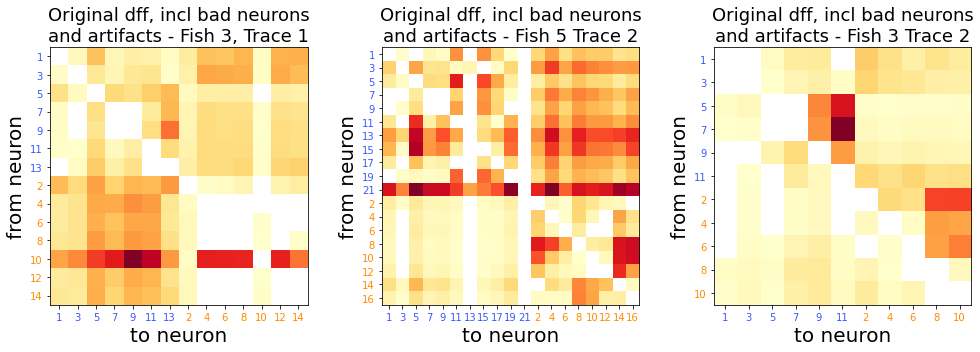

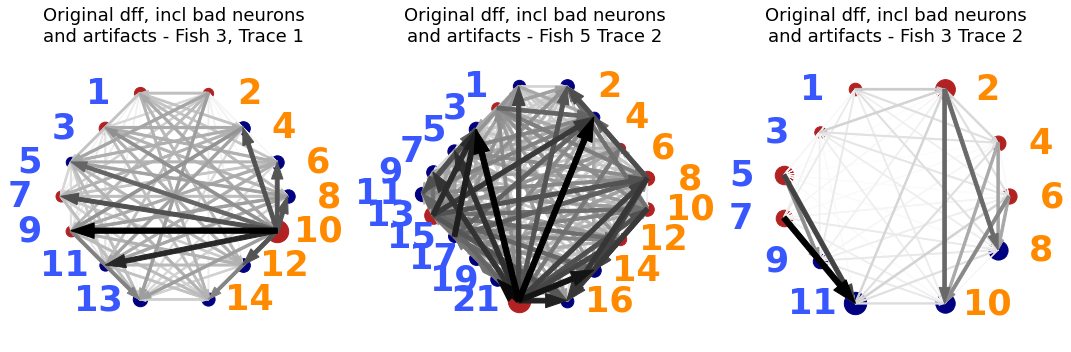

In [10]:
# 1. GC on the original dff with bad neurons and artifacts

signals_dff_bad1 = dff_dict_with_bad_neurons.get((fish1, trace1))
gc_sig_dff_bad1, gc_dff_bad1, fstat_dff_bad1, threshold_F_dff_bad1 = bivariateLinearCausalityTE(signals_dff_bad1)

signals_dff_bad2 = dff_dict_with_bad_neurons.get((fish2, trace2))
gc_sig_dff_bad2, gc_dff_bad2, fstat_dff_bad2, threshold_F_dff_bad2 = bivariateLinearCausalityTE(signals_dff_bad2)

signals_dff_bad3 = dff_dict_with_bad_neurons.get((fish3, trace3))
gc_sig_dff_bad3, gc_dff_bad3, fstat_dff_bad3, threshold_F_dff_bad3 = bivariateLinearCausalityTE(signals_dff_bad3)


plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title(f'Original dff, incl bad neurons\nand artifacts - Fish {fish1}, Trace {trace1}', size=18)
plot_gc_matrix(gc_sig_dff_bad1, middle_dict.get((fish1, trace1)))

plt.subplot(132)
plt.title(f'Original dff, incl bad neurons\nand artifacts - Fish {fish2} Trace {trace2}', size=18)
plot_gc_matrix(gc_sig_dff_bad2, middle_dict.get((fish2, trace2)))

plt.subplot(133)
plt.title(f'Original dff, incl bad neurons\nand artifacts - Fish {fish3} Trace {trace3}', size=18)
plot_gc_matrix(gc_sig_dff_bad3, middle_dict.get((fish3, trace3)))
plt.tight_layout()
plt.show()


plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title(f'Original dff, incl bad neurons\nand artifacts - Fish {fish1}, Trace {trace1}', size=18)
plot_directed_graph(gc_sig_dff_bad1, middle_dict.get((fish1, trace1)))

plt.subplot(132)
plt.title(f'Original dff, incl bad neurons\nand artifacts - Fish {fish2} Trace {trace2}', size=18)
plot_directed_graph(gc_sig_dff_bad2, middle_dict.get((fish2, trace2)))

plt.subplot(133)
plt.title(f'Original dff, incl bad neurons\nand artifacts - Fish {fish3} Trace {trace3}', size=18)
plot_directed_graph(gc_sig_dff_bad3, middle_dict.get((fish3, trace3)))
plt.tight_layout()
plt.show()

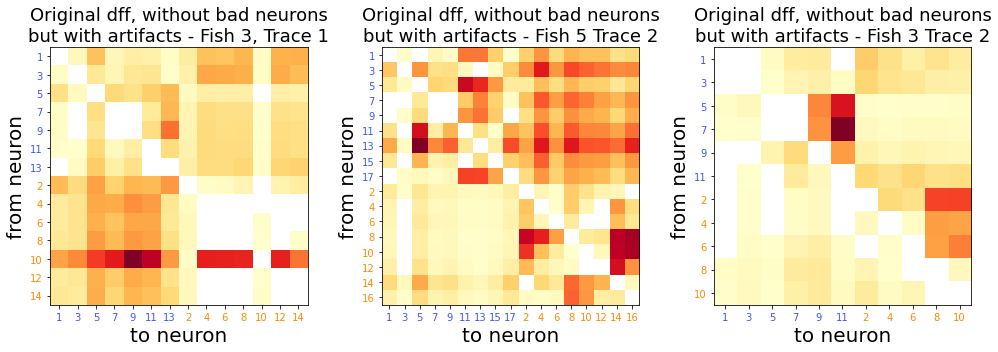

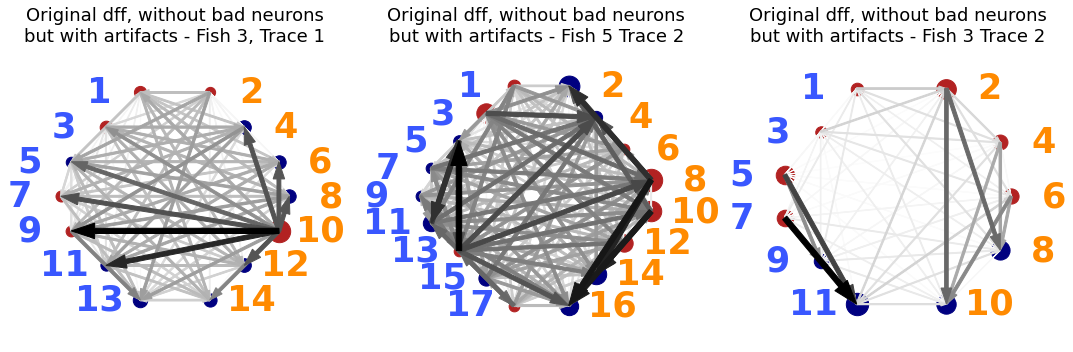

In [11]:
# 2. GC on the original dff without bad neurons but with artifacts

signals_dff1 = dff_removed_dict.get((fish1, trace1))
gc_sig_dff1, gc_dff1, fstat_dff1, threshold_F_dff1 = bivariateLinearCausalityTE(signals_dff1)

signals_dff2 = dff_removed_dict.get((fish2, trace2))
gc_sig_dff2, gc_dff2, fstat_dff2, threshold_F_dff2 = bivariateLinearCausalityTE(signals_dff2)

signals_dff3 = dff_removed_dict.get((fish3, trace3))
gc_sig_dff3, gc_dff3, fstat_dff3, threshold_F_dff3 = bivariateLinearCausalityTE(signals_dff3)


plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title(f'Original dff, without bad neurons\nbut with artifacts - Fish {fish1}, Trace {trace1}', size=18)
plot_gc_matrix(gc_sig_dff1, middle_removed_dict.get((fish1, trace1)))

# this one changes
plt.subplot(132)
plt.title(f'Original dff, without bad neurons\nbut with artifacts - Fish {fish2} Trace {trace2}', size=18)
plot_gc_matrix(gc_sig_dff2, middle_removed_dict.get((fish2, trace2)))

plt.subplot(133)
plt.title(f'Original dff, without bad neurons\nbut with artifacts - Fish {fish3} Trace {trace3}', size=18)
plot_gc_matrix(gc_sig_dff3, middle_removed_dict.get((fish3, trace3)))
plt.tight_layout()
plt.show()


plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title(f'Original dff, without bad neurons\nbut with artifacts - Fish {fish1}, Trace {trace1}', size=18)
plot_directed_graph(gc_sig_dff1, middle_removed_dict.get((fish1, trace1)))

plt.subplot(132)
plt.title(f'Original dff, without bad neurons\nbut with artifacts - Fish {fish2} Trace {trace2}', size=18)
plot_directed_graph(gc_sig_dff2, middle_removed_dict.get((fish2, trace2)))

plt.subplot(133)
plt.title(f'Original dff, without bad neurons\nbut with artifacts - Fish {fish3} Trace {trace3}', size=18)
plot_directed_graph(gc_sig_dff3, middle_removed_dict.get((fish3, trace3)))
plt.tight_layout()
plt.show()

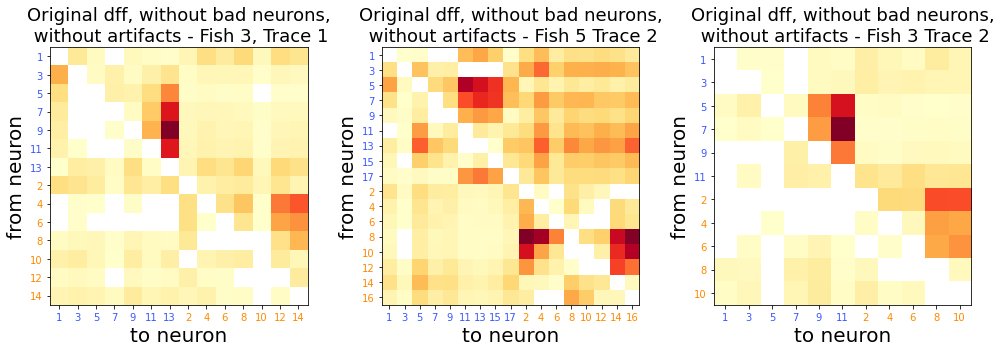

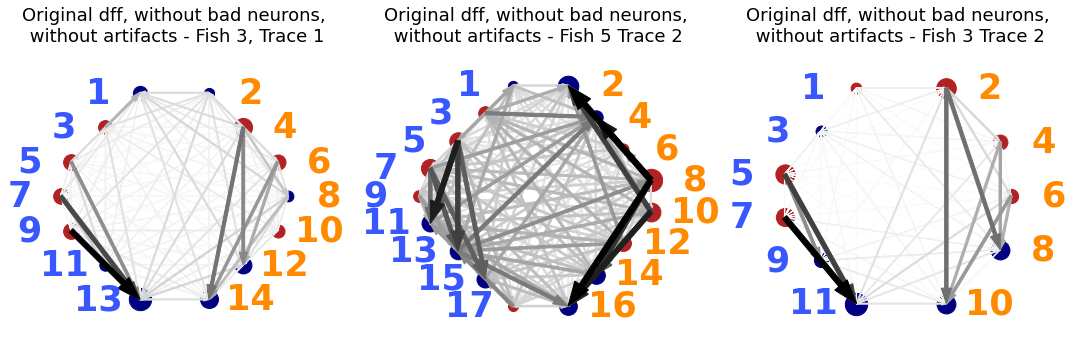

In [12]:
# 3. GC on the original dff without bad neurons, without artifacts

signals_dff_noMA1 = dff_corrected_dict.get((fish1, trace1))
gc_sig_dff_noMA1, gc_dff_noMA1, fstat_dff_noMA1, threshold_F_dff_noMA1 = bivariateLinearCausalityTE(signals_dff_noMA1)

signals_dff_noMA2 = dff_corrected_dict.get((fish2, trace2))
gc_sig_dff_noMA2, gc_dff_noMA2, fstat_dff_noMA2, threshold_F_dff_noMA2 = bivariateLinearCausalityTE(signals_dff_noMA2)

signals_dff_noMA3 = dff_corrected_dict.get((fish3, trace3))
gc_sig_dff_noMA3, gc_dff_noMA3, fstat_dff_noMA3, threshold_F_dff_noMA3 = bivariateLinearCausalityTE(signals_dff_noMA3)


plt.figure(figsize=(15,5))
# this one changes:
plt.subplot(131)
plt.title(f'Original dff, without bad neurons,\n without artifacts - Fish {fish1}, Trace {trace1}', size=18)
plot_gc_matrix(gc_sig_dff_noMA1, middle_removed_dict.get((fish1, trace1)))

plt.subplot(132)
plt.title(f'Original dff, without bad neurons,\n without artifacts - Fish {fish2} Trace {trace2}', size=18)
plot_gc_matrix(gc_sig_dff_noMA2, middle_removed_dict.get((fish2, trace2)))

plt.subplot(133)
plt.title(f'Original dff, without bad neurons,\n without artifacts - Fish {fish3} Trace {trace3}', size=18)
plot_gc_matrix(gc_sig_dff_noMA3, middle_removed_dict.get((fish3, trace3)))

plt.tight_layout()
plt.show()


plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title(f'Original dff, without bad neurons,\n without artifacts - Fish {fish1}, Trace {trace1}', size=18)
plot_directed_graph(gc_sig_dff_noMA1, middle_removed_dict.get((fish1, trace1)))

plt.subplot(132)
plt.title(f'Original dff, without bad neurons,\n without artifacts - Fish {fish2} Trace {trace2}', size=18)
plot_directed_graph(gc_sig_dff_noMA2, middle_removed_dict.get((fish2, trace2)))

plt.subplot(133)
plt.title(f'Original dff, without bad neurons,\n without artifacts - Fish {fish3} Trace {trace3}', size=18)
plot_directed_graph(gc_sig_dff_noMA3, middle_removed_dict.get((fish3, trace3)))

plt.tight_layout()
plt.show()

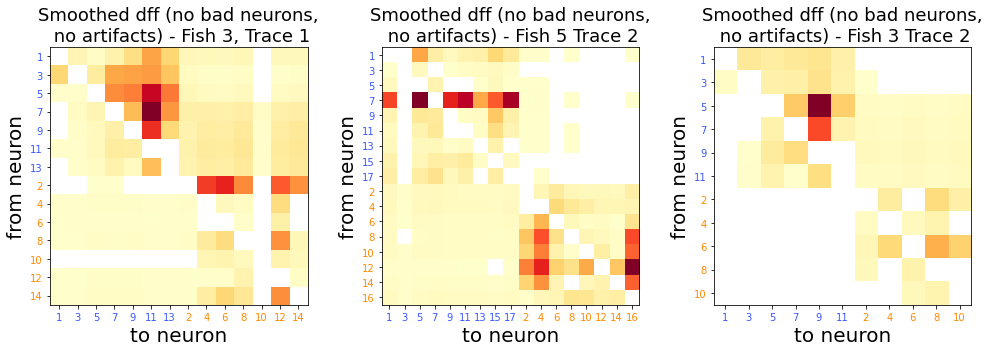

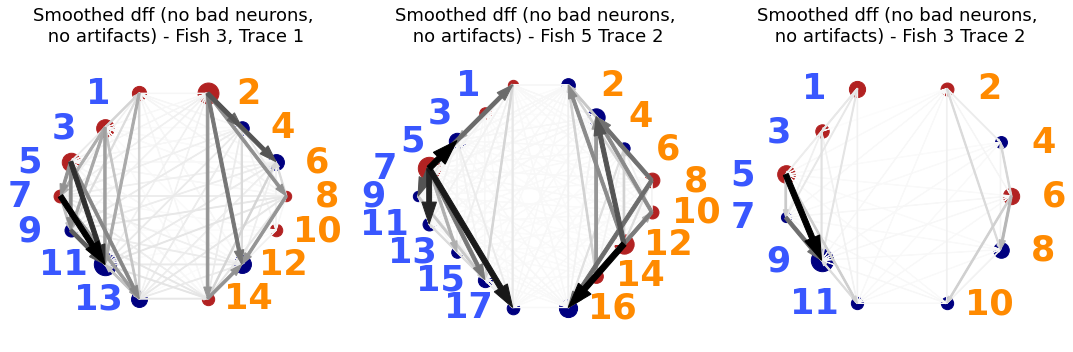

In [13]:
# 4. GC on the smoothed dff (without bad neurons, without artifacts)

signals_dff_smooth1 = dff_smoothed_dict.get((fish1, trace1))
gc_sig_dff_smooth1, gc_dff_smooth1, fstat_dff_smooth1, threshold_F_dff_smooth1 = bivariateLinearCausalityTE(signals_dff_smooth1)

signals_dff_smooth2 = dff_smoothed_dict.get((fish2, trace2))
gc_sig_dff_smooth2, gc_dff_smooth2, fstat_dff_smooth2, threshold_F_dff_smooth2 = bivariateLinearCausalityTE(signals_dff_smooth2)

signals_dff_smooth3 = dff_smoothed_dict.get((fish3, trace3))
gc_sig_dff_smooth3, gc_dff_smooth3, fstat_dff_smooth3, threshold_F_dff_smooth3 = bivariateLinearCausalityTE(signals_dff_smooth3)


plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title(f'Smoothed dff (no bad neurons,\n no artifacts) - Fish {fish1}, Trace {trace1}', size=18)
plot_gc_matrix(gc_sig_dff_smooth1, middle_removed_dict.get((fish1, trace1)))

plt.subplot(132)
plt.title(f'Smoothed dff (no bad neurons,\n no artifacts) - Fish {fish2} Trace {trace2}', size=18)
plot_gc_matrix(gc_sig_dff_smooth2, middle_removed_dict.get((fish2, trace2)))

plt.subplot(133)
plt.title(f'Smoothed dff (no bad neurons,\n no artifacts) - Fish {fish3} Trace {trace3}', size=18)
plot_gc_matrix(gc_sig_dff_smooth3, middle_removed_dict.get((fish3, trace3)))
plt.tight_layout()
plt.show()


plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title(f'Smoothed dff (no bad neurons,\n no artifacts) - Fish {fish1}, Trace {trace1}', size=18)
plot_directed_graph(gc_sig_dff_smooth1, middle_removed_dict.get((fish1, trace1)))

plt.subplot(132)
plt.title(f'Smoothed dff (no bad neurons,\n no artifacts) - Fish {fish2} Trace {trace2}', size=18)
plot_directed_graph(gc_sig_dff_smooth2, middle_removed_dict.get((fish2, trace2)))

plt.subplot(133)
plt.title(f'Smoothed dff (no bad neurons,\n no artifacts) - Fish {fish3} Trace {trace3}', size=18)
plot_directed_graph(gc_sig_dff_smooth3, middle_removed_dict.get((fish3, trace3)))
plt.tight_layout()
plt.show()


In [17]:
# Code to generate the new threshold for BVGC - this takes time.
"""
    Run bivariate GC on the smoothed fluorescence traces.
    Then shift the driving neuron's trace nmc times to generate a new null hypothesis for testing whether
    a link is significant or not.
    If you just want to plot the figures, you can skip this and use the data already in new_threshold_dict.
"""


dfn = n_lags
nmc = 10 # nmc = 1000 in the paper

# If you want to do in for all fish, all traces, you can adapt the code, for example:
# all_gcs_sh_list = []
# all_fstats_sh_list = []
# dfd_list = []
# for fish in get_fish_trace.keys():
#      for trace in get_fish_trace.get(fish):
#          # As below {
#               signals = dff_smoothed_dict.get((fish, trace)).copy()
#               [...] 
#               dfd = np.argmax(log_likelihood_list)
#          }
#          all_gcs_sh_list.append(all_gcs_sh)
#          all_fstats_sh_list.append(all_fstats_sh)
#          dfd_list.append(dfd)


# To generate for one fish-trace pair:
fish = fish1
trace = trace1

signals = dff_smoothed_dict.get((fish, trace)).copy()
n_cells = len(signals)
n_timesteps = len(signals[0])

all_gcs_sh = np.zeros([n_cells, n_cells, nmc])  # GC matrices for each shift
all_fstats_sh = np.zeros([n_cells, n_cells, nmc])  # Fstat matrices for each shift


for i in range(n_cells):
    for j in range(n_cells):
        if i != j:
            signal2 = signals[j]

            for n in range(nmc):
                # Shift signal1 nmc times: signal1_sh = [signal1[shift_idx:], signal1[:shift_idx]]
                # the shift_signal function calls np.roll
                signal1_sh = shift_signal(signals[i])
                _, GC, Fstat, _ = bvgc_2_signals(signal1_sh, signal2, n_lags=n_lags, pval=p_val)

                all_gcs_sh[i][j][n] = GC
                all_fstats_sh[i][j][n] = Fstat
        else:
            for n in range(nmc):
                all_gcs_sh[i][j][n] = np.nan
                all_fstats_sh[i][j][n] = np.nan          


afs = all_fstats_sh[all_fstats_sh>0]
q1 = np.percentile(afs, 25, interpolation = 'midpoint')
q3 = np.percentile(afs, 75, interpolation = 'midpoint')
iqr = q3-q1 # inter-quartile range

outlier_threshold = 15 # iqr # to exclude outliers in all_fstats_sh

log_likelihood_list = []

for dfd_to_fit in range(1, 21):
    log_like = 0
    for a in afs:
        if a < outlier_threshold:
            log_like = log_like + np.log(stats.f.pdf(a, n_lags, dfd_to_fit))
            
    log_like = log_like / len(afs)
    log_likelihood_list.append(log_like)
    
dfd = np.argmax(log_likelihood_list)

all_gcs_sh1 = all_gcs_sh
all_fstats_sh1 = all_fstats_sh
n_cells1 = n_cells
dfd1 = dfd






fish = fish2
trace = trace2

signals = dff_smoothed_dict.get((fish, trace)).copy()
n_cells = len(signals)
n_timesteps = len(signals[0])

all_gcs_sh = np.zeros([n_cells, n_cells, nmc])  # GC matrices for each shuffle
all_fstats_sh = np.zeros([n_cells, n_cells, nmc])  # Fstat matrices for each shuffle


for i in range(n_cells):
    for j in range(n_cells):
        if i != j:
            signal2 = signals[j]

            for n in range(nmc):
                # Shift signal1 nmc times: signal1_sh = [signal1[shift_idx:], signal1[:shift_idx]]
                # the shift_signal function calls np.roll
                signal1_sh = shift_signal(signals[i])
                _, GC, Fstat, _ = bvgc_2_signals(signal1_sh, signal2, n_lags=n_lags, pval=p_val)

                all_gcs_sh[i][j][n] = GC
                all_fstats_sh[i][j][n] = Fstat
        else:
            for n in range(nmc):
                all_gcs_sh[i][j][n] = np.nan
                all_fstats_sh[i][j][n] = np.nan


afs = all_fstats_sh[all_fstats_sh>0]
q1 = np.percentile(afs, 25, interpolation = 'midpoint')
q3 = np.percentile(afs, 75, interpolation = 'midpoint')
iqr = q3-q1 # inter-quartile range

outlier_threshold = 20 # iqr # to exclude outliers in all_fstats_sh

log_likelihood_list = []

for dfd_to_fit in range(1, 21):
    log_like = 0
    for a in afs:
        if a < outlier_threshold:
            log_like = log_like + np.log(stats.f.pdf(a, n_lags, dfd_to_fit))
            
    log_like = log_like / len(afs)
    log_likelihood_list.append(log_like)
    
dfd = np.argmax(log_likelihood_list)

all_gcs_sh2 = all_gcs_sh
all_fstats_sh2 = all_fstats_sh
n_cells2 = n_cells
dfd2 = dfd







fish = fish3
trace = trace3

signals = dff_smoothed_dict.get((fish, trace)).copy()
n_cells = len(signals)
n_timesteps = len(signals[0])

all_gcs_sh = np.zeros([n_cells, n_cells, nmc])  # GC matrices for each shift
all_fstats_sh = np.zeros([n_cells, n_cells, nmc])  # Fstat matrices for each shift

for i in range(n_cells):
    for j in range(n_cells):
        if i != j:
            signal2 = signals[j]

            for n in range(nmc):
                # Shift signal1 nmc times: signal1_sh = [signal1[shift_idx:], signal1[:shift_idx]]
                # the shift_signal function calls np.roll
                signal1_sh = shift_signal(signals[i])
                _, GC, Fstat, _ = bvgc_2_signals(signal1_sh, signal2, n_lags=n_lags, pval=p_val)

                all_gcs_sh[i][j][n] = GC
                all_fstats_sh[i][j][n] = Fstat
        else:
            for n in range(nmc):
                all_gcs_sh[i][j][n] = np.nan
                all_fstats_sh[i][j][n] = np.nan

afs = all_fstats_sh[all_fstats_sh>0]
q1 = np.percentile(afs, 25, interpolation = 'midpoint')
q3 = np.percentile(afs, 75, interpolation = 'midpoint')
iqr = q3-q1 # inter-quartile range

outlier_threshold = 20 # iqr # to exclude outliers in all_fstats_sh

log_likelihood_list = []

for dfd_to_fit in range(1, 21):
    log_like = 0
    for a in afs:
        if a < outlier_threshold:
            log_like = log_like + np.log(stats.f.pdf(a, n_lags, dfd_to_fit))
            
    log_like = log_like / len(afs)
    log_likelihood_list.append(log_like)
    
dfd = np.argmax(log_likelihood_list)

all_gcs_sh3 = all_gcs_sh
all_fstats_sh3 = all_fstats_sh
n_cells3 = n_cells
dfd3 = dfd

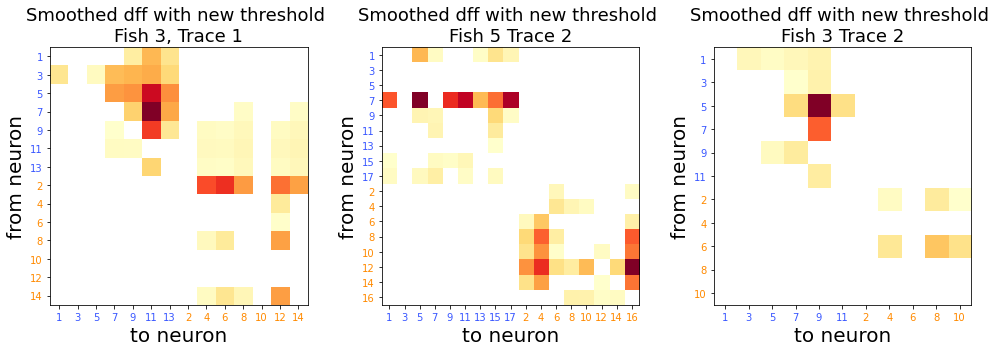

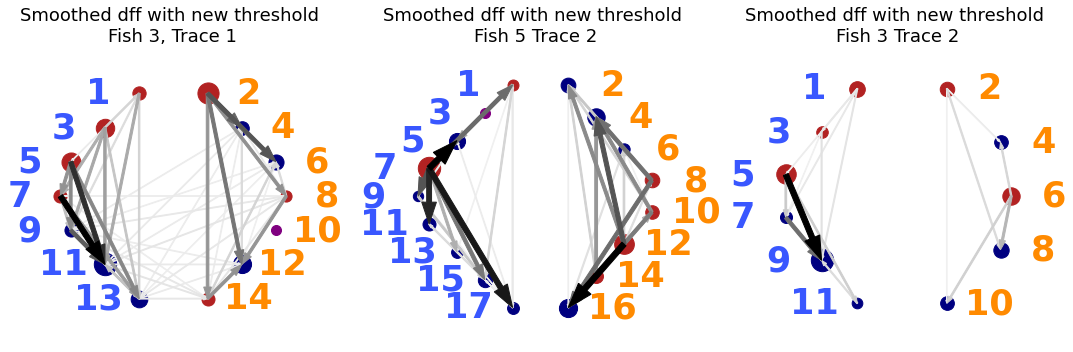

In [18]:
# 5. Using GC on smoothed dff with new threshold to generate new GC_sig matrix (final GC)

# To use generated threshold:
n_pairs1 = n_cells1 * (n_cells1 - 1)
threshold_new1 = stats.f.ppf(1 - p_val/n_pairs1, dfn, dfd1)

n_pairs2 = n_cells2 * (n_cells2 - 1)
threshold_new2 = stats.f.ppf(1 - p_val/n_pairs2, dfn, dfd2)

n_pairs3 = n_cells3 * (n_cells3 - 1)
threshold_new3 = stats.f.ppf(1 - p_val/n_pairs3, dfn, dfd3)

# To use saved threshold:
# threshold_new1 = new_threshold_dict.get((fish1, trace1, 'BV'))
gc_sig_new1 = get_GC_sig(gc_sig_dff_smooth1, fstat_dff_smooth1, threshold_new1)

# threshold_new2 = new_threshold_dict.get((fish2, trace2, 'BV'))
gc_sig_new2 = get_GC_sig(gc_sig_dff_smooth2, fstat_dff_smooth2, threshold_new2)

# threshold_new3 = new_threshold_dict.get((fish3, trace3, 'BV'))
gc_sig_new3 = get_GC_sig(gc_sig_dff_smooth3, fstat_dff_smooth3, threshold_new3)


plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title(f'Smoothed dff with new threshold \nFish {fish1}, Trace {trace1}', size=18)
plot_gc_matrix(gc_sig_new1, middle_removed_dict.get((fish1, trace1)))

plt.subplot(132)
plt.title(f'Smoothed dff with new threshold \nFish {fish2} Trace {trace2}', size=18)
plot_gc_matrix(gc_sig_new2, middle_removed_dict.get((fish2, trace2)))

plt.subplot(133)
plt.title(f'Smoothed dff with new threshold \nFish {fish3} Trace {trace3}', size=18)
plot_gc_matrix(gc_sig_new3, middle_removed_dict.get((fish3, trace3)))
plt.tight_layout()
plt.show()


plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title(f'Smoothed dff with new threshold \nFish {fish1}, Trace {trace1}', size=18)
plot_directed_graph(gc_sig_new1, middle_removed_dict.get((fish1, trace1)))

plt.subplot(132)
plt.title(f'Smoothed dff with new threshold \nFish {fish2} Trace {trace2}', size=18)
plot_directed_graph(gc_sig_new2, middle_removed_dict.get((fish2, trace2)))

plt.subplot(133)
plt.title(f'Smoothed dff with new threshold \nFish {fish3} Trace {trace3}', size=18)
plot_directed_graph(gc_sig_new3, middle_removed_dict.get((fish3, trace3)))
plt.tight_layout()
plt.show()

In [19]:
# Generate ratios
fish = fish3
trace = trace3

# Note that in df_motoneurons:
# dff: bad neurons removed, no motion artifact correction.
# f_smooth: bad neurons removed, motion artifact corrected, smoothed.
# So need to use middle_removed_dict for both.
fluo_type = 'f_smooth' # or 'dff'  
multi = False

# from pre-computed values if code above not run
df_fish_trace = df_motoneurons.loc[df_motoneurons.Fish == fish].loc[df_motoneurons.Trace == trace]
df_FT_type_BV_or_MV = df_fish_trace.loc[df_fish_trace.fluo_type == fluo_type].loc[df_fish_trace.multivariate == multi]
gc_sig = df_FT_type_BV_or_MV.GC_sig.values[0]
# gcsig = df_FT_type_BV_or_MV.GC_sig_new_thresh.values[0]

# or gc_sig = one of the above:
# gc_sig_dff_bad1, gc_sig_dff1, gc_sig_dff_noMA1, gc_sig_dff_smooth1, gc_sig_new1
# gc_sig_dff_bad2, gc_sig_dff2, gc_sig_dff_noMA2, gc_sig_dff_smooth2, gc_sig_new2
# gc_sig_dff_bad3, gc_sig_dff3, gc_sig_dff_noMA3, gc_sig_dff_smooth3, gc_sig_new3

# mid = middle_dict.get((fish, trace))
mid = middle_removed_dict.get((fish, trace))

ic_ratio = get_ratio_from_GC(gc_sig, mid, ratio_type='ipsi')
rc_ratio = get_ratio_from_GC(gc_sig, mid, ratio_type='RC')

print(ic_ratio, rc_ratio)

0.7722951032417499 0.6908170597724328


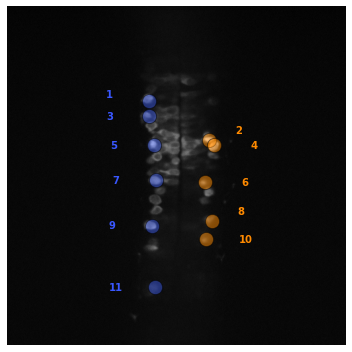

In [20]:
# Plot background and cells
background = background_dict.get((fish, trace))
cell_centers = cell_centers_dict.get((fish, trace))  # cell_centers_removed_dict.get((fish, trace))
n_cells = len(cell_centers)
mid = middle_dict.get((fish, trace))  # middle_removed_dict.get((fish, trace))
cell_centers_left = cell_centers[:mid]
cell_centers_right = cell_centers[mid:]


fig, ax = plt.subplots(figsize=(5,5))
plt.imshow(background, cmap=plt.cm.gist_gray, aspect='equal')
plt.scatter(cell_centers_left[:,0], cell_centers_left[:,1], color=rgb_left, edgecolor='black', alpha=0.5, s=200)
plt.scatter(cell_centers_right[:,0], cell_centers_right[:,1], color=rgb_right, edgecolor='black', alpha=0.5, s=200)

label_list, color_list = get_label_and_color_lists(mid, n_cells)
for i, label, color, pos in zip(range(n_cells), label_list, color_list, cell_centers):
    if i < mid:
        if label == 1:
            k = 10
        else:
            k = 0
        plt.text(pos[0] - 60, pos[1] - k, label, va='center', ha='center', color=color, size=10, fontweight='bold')
    else:
        if label == 2 or label == 8:
            k = 15
        else:
            k = 0
        plt.text(pos[0] + 60 - k, pos[1] - k, label, va='center', ha='center', color=color, size=10, fontweight='bold')

plt.axis('off')
plt.tight_layout()
plt.show()

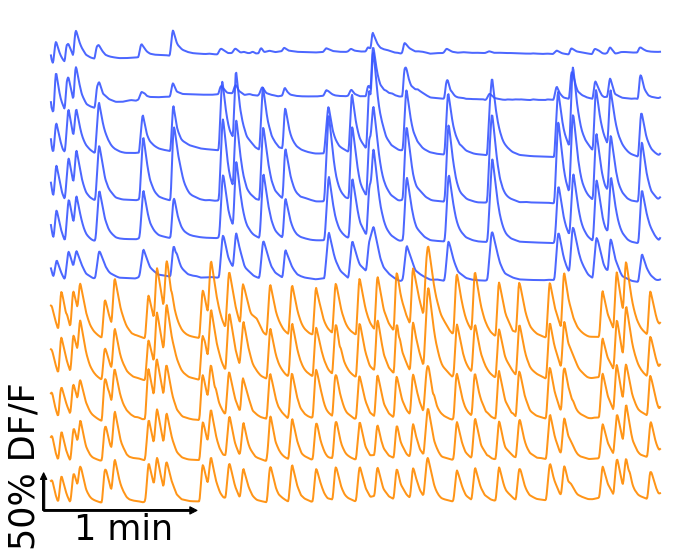

In [21]:
# Fluorescence signals figure
df_fish_trace = df_motoneurons.loc[df_motoneurons.Fish == fish].loc[df_motoneurons.Trace == trace]
df_FT_type_BV_or_MV = df_fish_trace.loc[df_fish_trace.fluo_type == fluo_type].loc[df_fish_trace.multivariate == multi]
fluo = df_FT_type_BV_or_MV.fluo.values[0]

# or fluo = one of the above:
# signals_dff_bad1, signals_dff1, signals_dff_noMA1, signals_dff_smooth1
# signals_dff_bad2, signals_dff2, signals_dff_noMA2, signals_dff_smooth2
# signals_dff_bad3, signals_dff3, signals_dff_noMA3, signals_dff_smooth3

cell_centers = cell_centers_dict.get((fish, trace))  # cell_centers_removed_dict.get((fish, trace))
n_cells = len(cell_centers)
mid = middle_dict.get((fish, trace))  # middle_removed_dict.get((fish, trace))
cell_centers_left = cell_centers[:mid]
cell_centers_right = cell_centers[mid:]


plt.figure(figsize=(10,8))
label_list, color_list = get_label_and_color_lists(mid, n_cells)
for i, label, color, pos in zip(range(n_cells), label_list, color_list, cell_centers):
    plt.plot(np.linspace(0, rec_time, n_timesteps), fluo[i]-70*i, linewidth=2, color=color, alpha=0.9)

plt.axis('off')
x_len = plt.gca().get_xlim()[1]-plt.gca().get_xlim()[0]
y_len = plt.gca().get_ylim()[1]-plt.gca().get_ylim()[0]

textsize=35
plt.arrow(-3,-738, 60, 0, width=3, head_length=3, head_width=12, color='k')
plt.text(30, -741, '1 min', va='top', ha='center', size=textsize)

plt.arrow(-3,-738, 0, 50, width=0.9, head_length=11, color='k')
plt.text(-4, -800, '50% DF/F', va='bottom', ha='right', size=textsize, rotation=90)


plt.tight_layout()
plt.show()